# Part I - Exploration of marketing opportunities for prosper.com
## by Sven Huff

## Introduction


## Preliminary Wrangling


In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [30]:
df = pd.read_csv('../data/prosperLoanData.csv')

In [31]:
#copy dataset
df_clean = df.copy()

In [32]:
df_clean.shape

(113937, 81)

In [33]:
df_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [34]:
pd.options.display.max_columns = None
df_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [35]:
#Investigate for missing values
missing_values = df_clean.isnull().sum()/ len(df) * 100
missing_values = pd.DataFrame(missing_values)
pd.options.display.max_rows = None
missing_values

,0
ListingKey,0.000000
ListingNumber,0.000000
ListingCreationDate,0.000000
CreditGrade,74.588588
Term,0.000000
LoanStatus,0.000000
ClosedDate,51.649596
BorrowerAPR,0.021942
BorrowerRate,0.000000
LenderYield,0.000000


### Completeness of data
The set is more or less complete. **"EstimatedReturn", "ProsperRating (numeric)", "ProsperRating (Alpha)", "ProsperScore"** lack 25% of data. But this is because these are only applicable for loans originated after 2009. **CreditGrade** lacks 75% of data because it is only applicable for data originating before 2009. **ClosedDate** lacks 52% data. Means most of the credits are not closed yet. **"TotalProsperLoans"**, **"TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding", "ScorexChangeAtTimeOfListing"** are lacking 80% of data – meaning that 20% of the population does not have prior loans.<br>
<br>
**I don't drop any row or column because of missing values but keep them as is. I drop columns because they don't seem to answer my question** (See below)

### Drop columns

In [36]:
drop_cols = ['ListingKey', 'MemberKey', 'LoanNumber', 'LoanKey', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'ListingNumber', 'EmploymentStatusDuration', 'CurrentlyInGroup', 'GroupKey', 'TradesOpenedLast6Months']
for col in drop_cols:
    df_clean = df_clean.drop(col, axis = 1)

In [37]:
df_clean.head(2)

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,True,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,0.0,0.00,1500.0,11.0,0.81,0.17,"$25,000-49,999",True,3083.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,False,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,3989.0,0.21,10266.0,29.0,1.00,0.18,"$50,000-74,999",True,6125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### <font color = "green"> Review feedback <font>
CHANGE REQUIRED
IncomeRange is an ordinal variable and has an order.
Order of IncomeRange - [“$0”, "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", “$100,000+”]
You can go through this Knowledge Question for further reference

In [39]:
#Changing the IncomeRange into categorical data and order them
ranges = ['Not displayed', 'Not employed','$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+']
levels = pd.api.types.CategoricalDtype(categories=ranges, ordered = True)
df_clean['IncomeRange'] = df_clean['IncomeRange'].astype(levels)
df_clean['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

### What is the structure of your dataset?

The set contains 113937 data on loans from the US online platform prosper.com. It has 81 features like "StatedMonthleyIncome", "CreditGrade" and many more. I dropped so, which do not help to answer my question(s). 

### What is/are the main feature(s) of interest in your dataset?

For a possible marketing campaign, I want to know:<br>
Who are already prosper.com's customers? <br>
Who lies the most potential? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I am interested in Socio-Demographic features like "Income", "EmploymentStatus", where the borrowers are situated, and for what reasons people borrow money (on prosper.com) to address the needs of potential new prosper users.

## Univariate Exploration

### The volume of money traded on prosper.com

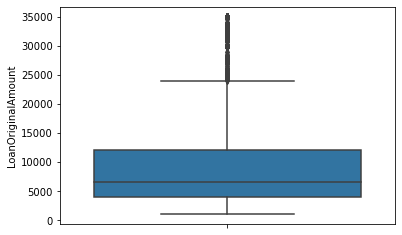

In [40]:
bp_orig_amount = sb.boxplot(y = 'LoanOriginalAmount', data = df)

In [41]:
median = df['LoanOriginalAmount'].median()
print(f"The median of borrowed money is {median:.2f}, meaning that 50% of borrowers borrowed less and 50% borrowed more.")

The median of borrowed money is 6500.00, meaning that 50% of borrowers borrowed less and 50% borrowed more.


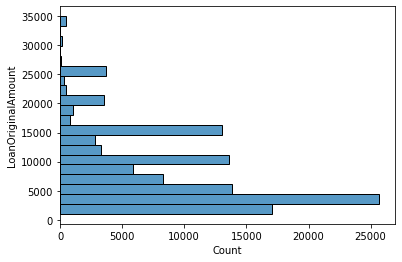

In [42]:
his_orig_amount = sb.histplot(y = "LoanOriginalAmount", bins = 20, data = df)

#### Obeservation
Most people are borrowing money from around 500 to 5000 Dollar. It could be interesting to check for what reason they borrow the money. 

### What people need money for on prosper.com

In [43]:
#Turn numeric encoded categories into string encoded categories
text = "0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans"
needs = {}
for pair in text.split(", "):
    pair_list = pair.split(" - ")
    if len(pair_list) == 2:
        key, value = pair_list
        key = int(key.strip())
        needs[key] = value.strip()
print(needs)

{0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}


In [44]:
#Function to replace categories
def replace_categories(cat):
    full_cat = needs.get(cat)
    if full_cat:
        return full_cat
    else:
        return cat

In [45]:
#Renaming the clumsy name 'ListingCategory (numeric)' into sth. more readable
df_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace = True)

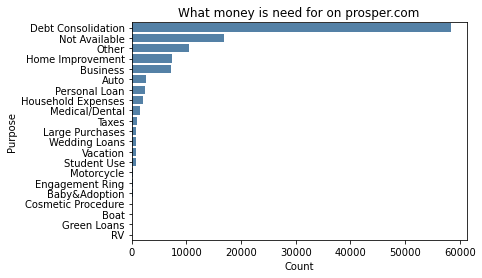

In [46]:
#Renaming the bars.
df_clean['ListingCategory'] = df_clean['ListingCategory'].apply(replace_categories)

#Displaying the value count
purpose_counts = df_clean['ListingCategory'].value_counts()
sb.barplot(x=purpose_counts, y=purpose_counts.index, orient='h', color='steelblue')
#sb.set(rc={'figure.figsize':(9,15)})
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('What money is need for on prosper.com')
plt.show()

#### Observation
Most people on Prosper use the platform for **debt consolidation**. So the question rises: How much do people using prosper.com earn? 
In the bivariate section, I answer the more obvious question in how far "borrower-amount" impacts the listing category.

### Income of prosper.com users

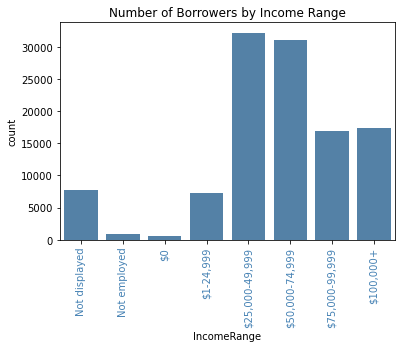

In [48]:
# create countplot
ax = sb.countplot(x='IncomeRange', data=df_clean, color='steelblue')
ax.set_title('Number of Borrowers by Income Range')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, color = "steelblue")

# set size of plot to adjust for rotated xtick labels
#plt.figure(figsize=(8, 6))


# set color of all bars to the same color
#for patch in ax.patches:
#  patch.set_color('steelblue')

plt.show()

#### Obersvation ####
For context: The **median income of US citizens** is around 54.000 in [2022](https://www.firstrepublic.com/insights-education/how-much-does-the-average-american-make). Back in 2009, it was [nearly the same](https://www.reuters.com/article/us-usa-economy-incomes-idUSTRE77302W20110804). 
**Attention** The data is not ordered from "least" to "most". <br> The users on prosper.com seem to be **more wealthy** in terms of money than the average citizen. This is confirmed by applying the "describe" method on the StatedMonthlyIncome. (Below this cell) <br> 
##### Important: #####
($ 5608 monthly mean income is above US average. However, this is to be taken carefully, indicated by the high max value and the high standard deviation. For a more indepth survey it's recommendable to focus on the 25% - 75% quartile.)

#### How prosperous are prosper users related to the whole Population?

In [49]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [50]:
df_clean['StatedMonthlyIncome'].describe()

count    113937.00
mean       5608.03
std        7478.50
min           0.00
25%        3200.33
50%        4666.67
75%        6825.00
max     1750002.92
Name: StatedMonthlyIncome, dtype: float64

 ### Which states' population uses prosper.com the most?

In [51]:
states = {
 'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'
}

In [52]:
def replace_states(state):
    full_name = states.get(state)
    if full_name:
        return full_name
    else:
        return state

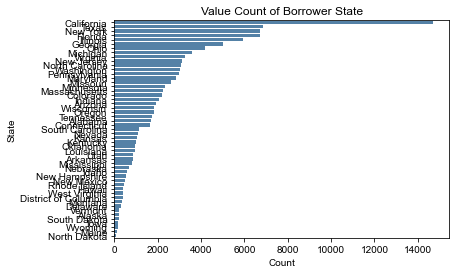

In [53]:
df_clean['BorrowerState'] = df_clean['BorrowerState'].apply(replace_states)
# Displaying the value counts of states
state_counts = df_clean['BorrowerState'].value_counts()
sb.barplot(x = state_counts, y=state_counts.index, orient = 'h', color='steelblue')
sb.set(rc={'figure.figsize':(9,15)})
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Value Count of Borrower State')
plt.show()

### Obeservation
Prosper.com is by far most popular in California. But does this chart hold true if we don't take absolute but relative values (states' population) into account? For this reason I looked up the [inhabitant counts.](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population)

### What is the ratio of state inhabitents to prosper.com users?

In [54]:
inhabitants = {
    "California": 39538223,
    "Texas": 29145505,
    "Florida": 21538187,
    "New York": 20201249,
    "Pennsylvania": 13002700,
    "Illinois": 12812508,
    "Ohio": 11799448,
    "Georgia": 10711908,
    "North Carolina": 10439388,
    "Michigan": 10077331,
    "New Jersey": 9288994,
    "Virginia": 8631393,
    "Washington": 7705281,
    "Arizona": 7151502,
    "Massachusetts": 7029917,
    "Tennessee": 6910840,
    "Indiana": 6785528,
    "Maryland": 6177224,
    "Missouri": 6154913,
    'Wisconsin':5893718 ,
   'Colorado':5773714 ,
   'Minnesota':5706494 ,
   'South Carolina':5118425 ,
   'Alabama':5024279 ,
   'Louisiana':4657757 ,
   'Kentucky':4505836 ,
   'Oregon':4237256 ,
   'Oklahoma':3959353 ,
   'Connecticut':3605944 ,
   'Utah':3271616 ,
   'Iowa':3190369 ,
   'Nevada':3104614 , 
   'Arkansas':3011524 , 
   'Mississippi':2961279 , 
    'Kansas' :2937880 , 
    'New Mexico' :2117522 , 
'Nebraska' :1961504 , 
'Idaho' :1839106 , 
'West Virginia' :1793716 , 
'Hawaii' :1455271 , 
'New Hampshire' :1377529 , 
'Maine' :1362359 , 
'Montana' :1084225 , 
'Rhode Island' :1097379 , 
'Delaware' :989948 , 
'South Dakota' :886667 ,  
'North Dakota' :779094 ,  
'Alaska':733391,  
'District of Columbia':689545,  
'Vermont' :643077,  
'Wyoming':576851
}

In [55]:
# Create an empty dataframe 
df_state_counts = pd.DataFrame(columns=['State', 'Count'])

# Populate dataframe with values from the state_counts
df_state_counts['State'] = state_counts.index
df_state_counts['Count'] = state_counts.values

#df_state_counts = df_state_counts.reset_index(drop=True)

# Add new column 'Prop' to the dataframe
df_state_counts['Prop'] = 0.0

# Calculate proportion of each state 
for i, row in df_state_counts.iterrows():
    state = row['State']
    count = row['Count']
    prop = count / inhabitants[state]
    
    # Assign the calculated value to the 'Prop' column 
    df_state_counts.at[i, 'Prop'] = prop

Text(0.5, 1.0, 'Popularity of prosper.com per State related to population')

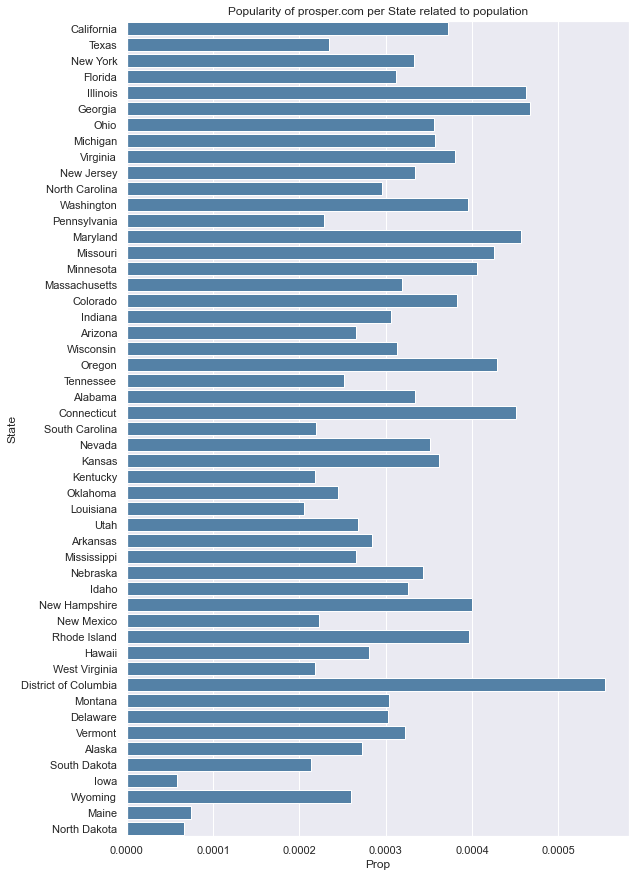

In [56]:
sb.barplot(x=df_state_counts['Prop'], y=df_state_counts['State'], orient='h', color='steelblue')
plt.title('Popularity of prosper.com per State related to population')

### Observation
Related to the inhabitants California is not "that big" anymore in terms of prosper.com usage. In fact: In every state, prosper.com is only used by a tiny fracture of the population. (Far below 0.1)<br> But what about professions? Is prosper.com favored by people who works in a specific profession?

### Occupations prosper.com users have

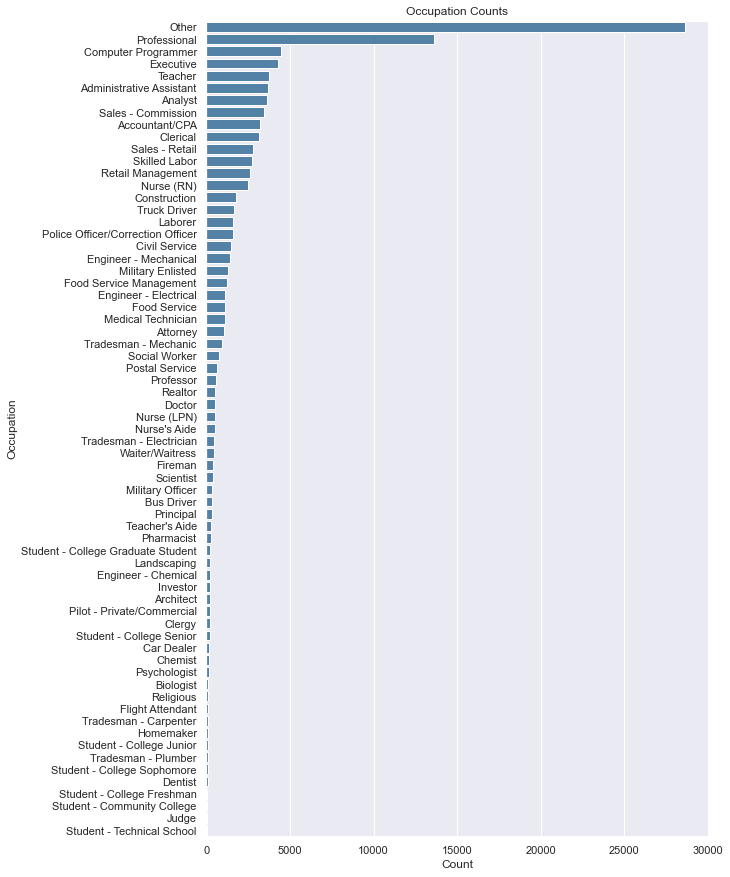

In [57]:
occupation_counts = df_clean['Occupation'].value_counts()
ax = sb.barplot(x=occupation_counts.values, y=occupation_counts.index, orient='horizontal', color = "steelblue")
#ax.tick_params(axis='y', which='major', pad=15)
ax.set(xlabel='Count', ylabel='Occupation', title='Occupation Counts')
#ax.set_xlim([0, max(occupation_counts.values) * 1.1])
plt.show()

### Observation
"Computer Programmers" are on third place of prosper.com users' profession. "Other" and "Professionals" are not specific enough occupations. At first glance every professions group is too small to justify a specific communication campaign.

### Summary Univariate Exploration

In absolute terms, California outperforms other states. In relative terms, this does not hold true. However, this is an interesting hint to target advertising campaigns locally. Also interesting is, that prosper.com's users seem more wealthy than the US average. This is even more interesting, due to the fact, that most people use prosper.com for debt consolidation. So maybe we could coin these users as "Wealthy. But broke"? 

I did not clear the data. All issues related to missing values are reasonable because of the 2009 "break". I would have done some data cleaning if I were interested in the time series. But this is not the case. So I only did some column renaming for readability reasons. 

## Bivariate Exploration

### How does the amount of loan relates to the purpose of the money?

/Users/beratung3/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


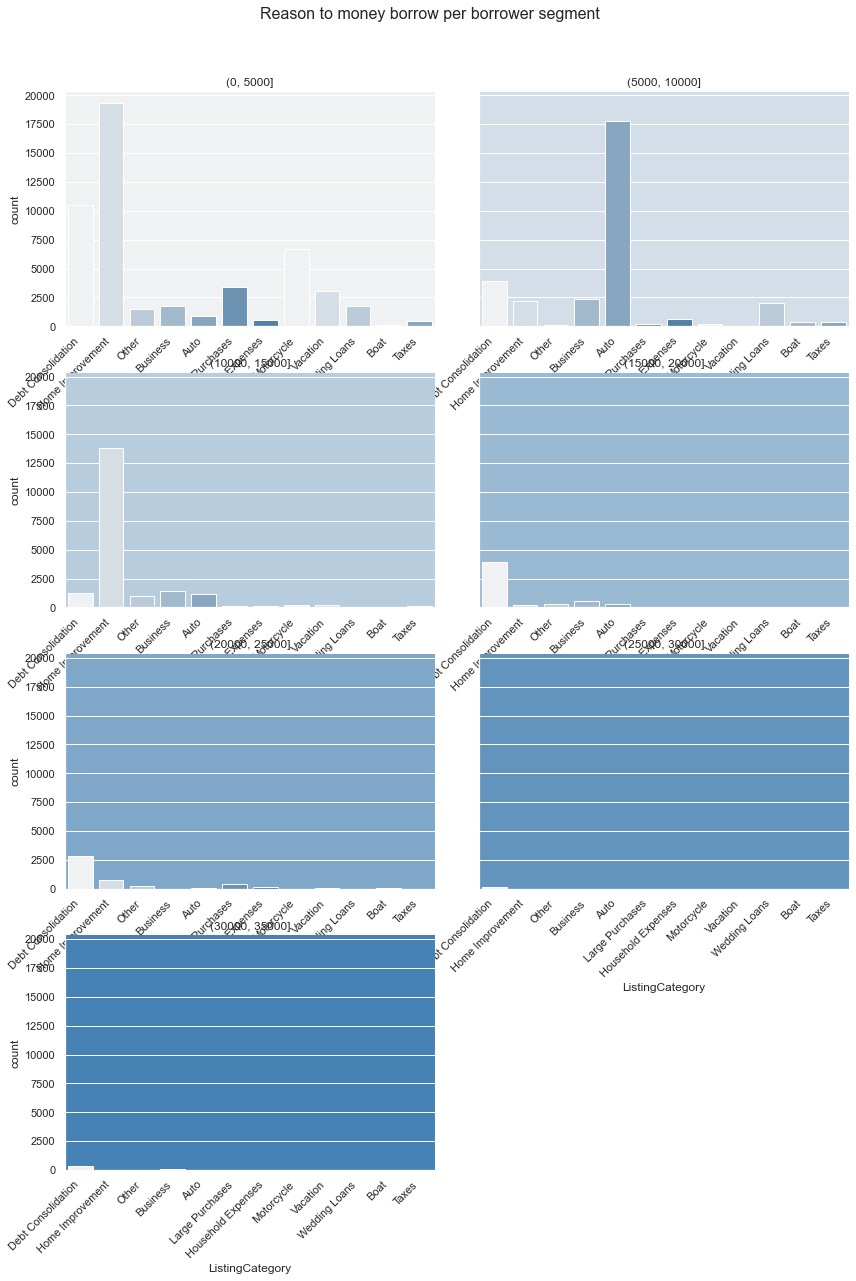

In [58]:
#Segment the borrower amounts
df_clean['LoanAmountCut'] = pd.cut(df_clean['LoanOriginalAmount'], bins=range(0, df_clean['LoanOriginalAmount'].max()+5000, 5000), include_lowest=False)
#Facet grid with loan amount
g = sb.FacetGrid(df_clean, col='LoanAmountCut', col_wrap=2, height=4, aspect= 1.5)
base_color = 'steelblue'
#Color the plots according to the borrowed amount
palette = sb.light_palette(base_color, n_colors=len(g.col_names))
g.map(sb.countplot, 'ListingCategory', palette = palette)
#Plot the graphs with titles, tickmarks, bottomlabels
for ax, title, color in zip(g.axes.flat, g.col_names, palette):
    ax.tick_params(axis='x', which='both', labelbottom=True)
    ax.set_title(title)
    ax.set_facecolor(color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
g.fig.suptitle('Reason to money borrow per borrower segment', fontsize=16, y=1.05)
plt.show()

### Observation
Where does the money go? (Related to the loan amount)?
Most people borrow money for "Debt Consolidation". But splitting the amounts related to the dollars borrowed shows a different picture: In the section with the loan amount of "0 - 5000", it is used for home improvement. In the section "5000 - 10.000" it is used for "Auto". Also "Home Improvement" in the "10.000 to 15.000" range. "Debt consolidation" becomes most prominent in the ranges "15.000 - 20.000", "20.000 - 25.000", "25.000 - 30.000", "30.000 - 35.000" 

### How does income relate to the purpose of the loan?

Text(0.5, 1.0, 'Income by Listing Category')

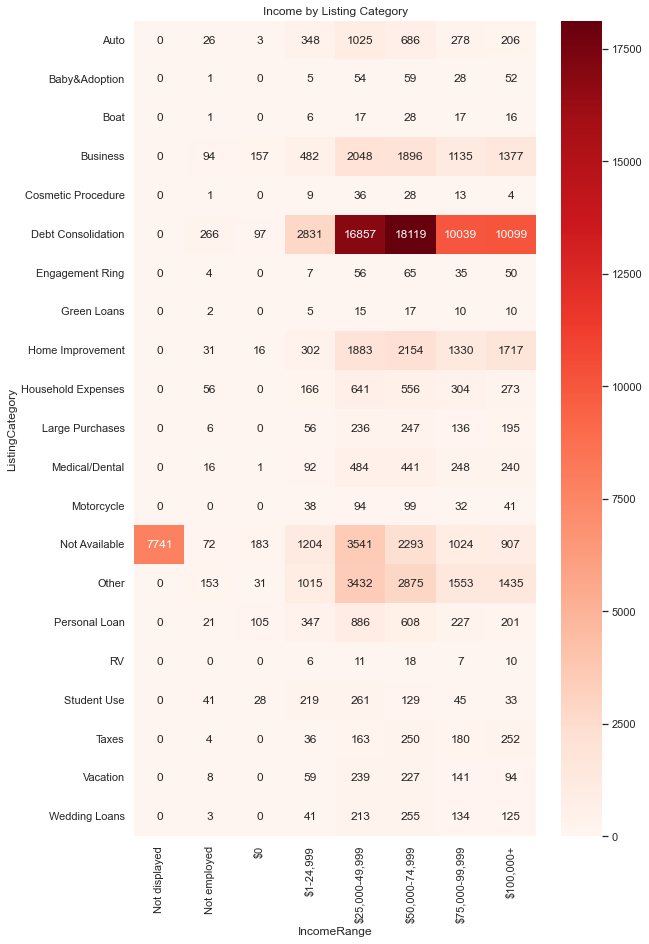

In [59]:
#Generate a crosstab to relate the counts of listing category to income range
income_listing = pd.crosstab(df_clean['ListingCategory'], df_clean['IncomeRange'])
#Heatmap with fmt = d to turn scientific number into ordinary number
heatmap_income_listing = sb.heatmap(income_listing, cmap='Reds', annot = True, fmt = 'd')
heatmap_income_listing.set_title('Income by Listing Category')

### Observation
This heatmap could provide inspirations for messages send to different income groups. So the Listing Category related to the income shows that **Debt Consolidation** is most important for higher incomes. **"Auto"** and **"Home Improvement"** seems to be important for all income ranges. (In way smaller figures). 

It seems obvious, that higher income ranges provide the most potential. So it might be a good idea to target people who wants to consolidate their debts. But how is the risk of defaulting distributed? This could damage the reputation of prosper.com. Do areas exists, which are prone to defaulting? To get an idea of this risk I take a look at the Loan Status.

### Do a relation between loan status and purpose of the loan exist?

Text(0.5, 1.0, 'Status by Listing Category')

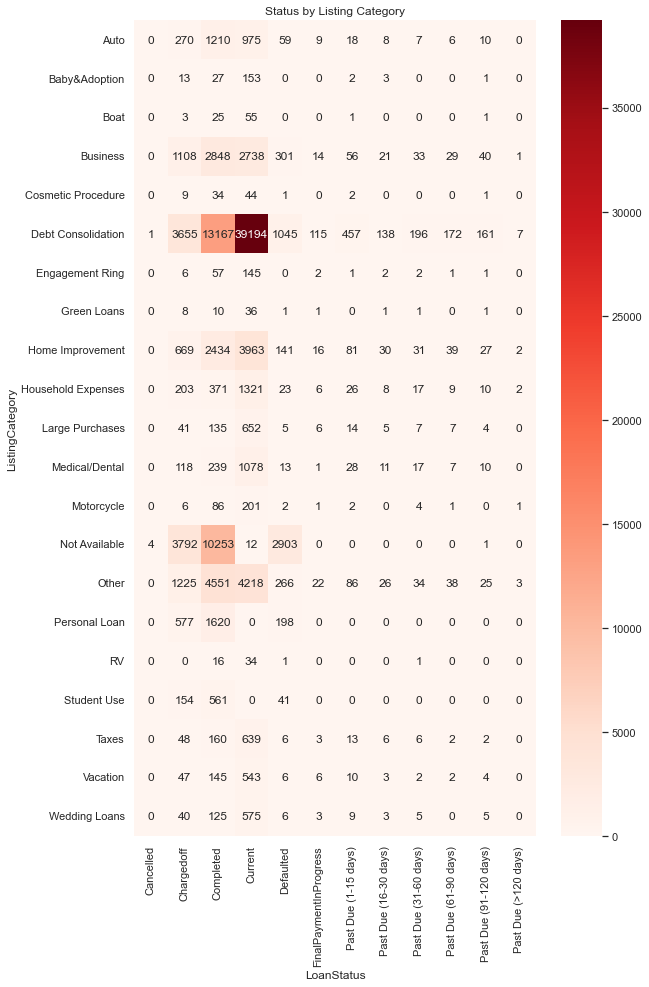

In [60]:
#Relate listing category to loan status
status_listing = pd.crosstab(df_clean['ListingCategory'], df_clean['LoanStatus'])
heatmap_status_listing = sb.heatmap(status_listing, cmap='Reds', annot = True, fmt = 'd')
heatmap_status_listing.set_title('Status by Listing Category')

### Observation
All in all the status seems to be – for me – surprisingly healthy. Most borrowers defaulted in the "not available" category followed by "Debt Consolidation". But given that this is the most important category this seems reasonable. Maybe due to the fact that I don't speak English natively, **I don't see any alarming relationship between "Loan Status" and "Listing Category"**.<br>
<br>
So the question arises which loan amounts do different employments statusses borrow.

### Loan amount related to Employment status

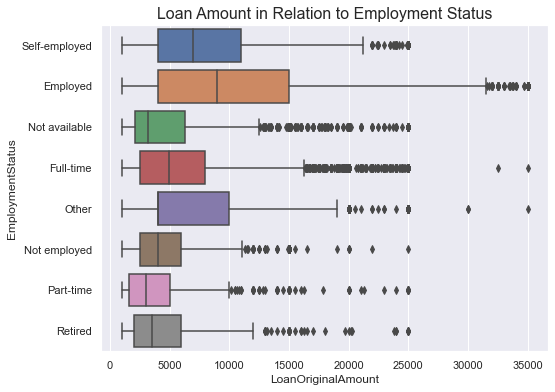

In [61]:
#How does Employment status and BorrowerRate relate?
plt.figure(figsize=(8, 6))
df_clean['StatedMonthlyIncome'].fillna(0, inplace=True)
#df_clean['EmploymentStatus'].fillna('No_Status', inplace=True)
sb.boxplot(x='LoanOriginalAmount', y='EmploymentStatus', data=df_clean);
plt.title('Loan Amount in Relation to Employment Status', fontsize=16);

### Observation 
Not surprisingly employed persons borrow more money, than other people. To target more precisely it would be good to know how much different occupations borrow. 

### Borrowed money in relation to occupation

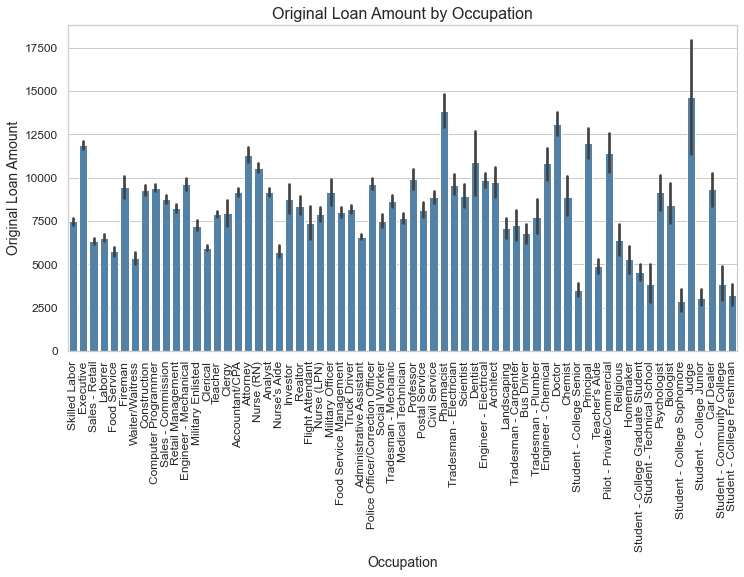

In [62]:
# Drop "Other" and "Professional" because these terms are to vague
df_occupation = df_clean.drop(df_clean[(df_clean['Occupation'] == 'Other') | (df_clean['Occupation'] == 'Professional')].index)

plt.figure(figsize=(12, 6))
sb.set_style('whitegrid')
sb.barplot(data=df_occupation, x='Occupation', y='LoanOriginalAmount', color = "steelblue", )
plt.title('Original Loan Amount by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Original Loan Amount', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observation
The above barchart helps to target different occupations with the appropriate amount of loan. For example in online ads. Are there Occupations which seem to be very "risk-friendly" – indicated by the "Debt to income ratio"? 

### Relation of occupation and consumeristic lifestyle

In [63]:
#I focus in occupation with value counts above 1000. So I drop those below. 
# Number of occurrences of each occupation
occupation_counts = df_clean['Occupation'].value_counts()
# Occupations with counts less than 1000
low_count_occupations = occupation_counts[occupation_counts < 1000].index.tolist()
#Remove rows where the occupation is in the low count list
df_filtered = df_clean[~df_clean['Occupation'].isin(low_count_occupations)]

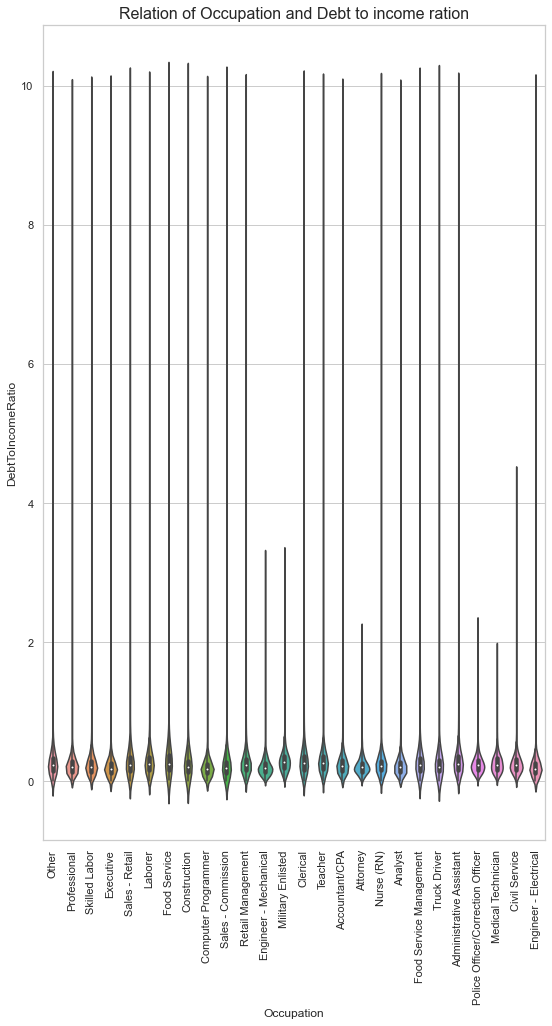

In [64]:
sb.violinplot(data=df_filtered, x='Occupation', y='DebtToIncomeRatio')
plt.xticks(rotation=90)
plt.title('Relation of Occupation and Debt to income ration', fontsize=16)
plt.show()

### Observation
I skipped all occupations with a value count below 1000. The remaining ones have reasonable median of debt to income ratio at around 0.3. However, there are outliers. In terms of exploitable potential: People working in Civil Service, Medical Technicians, Police Officers, Attorneys, Military Enlisted and Engineers seem to behave more "responsible" in financial belongings than other people.

### Summary bivariate exploration

Especially the borrower amount sections in relation to interesting category are interesting. The loan is most needed for debt consolidation. But related to the section there are differences. For example "Auto" is much more important in the "$ 5000 - 10.000" borrower section

Despite the fact, that most loans are needed for "Debt Consolidation", the prosper.com users are surprisingly "healthy" given, that there are relatively less credits defaulting. It's also interesting to see, that some occupations seems to be less "consume-orientated" and are therefore no good targets for a communication campaign – or demand a special communication. 

## Multivariate Exploration

### Loan Original Amount by Listing Category and Employment Status

<Figure size 720x360 with 0 Axes>

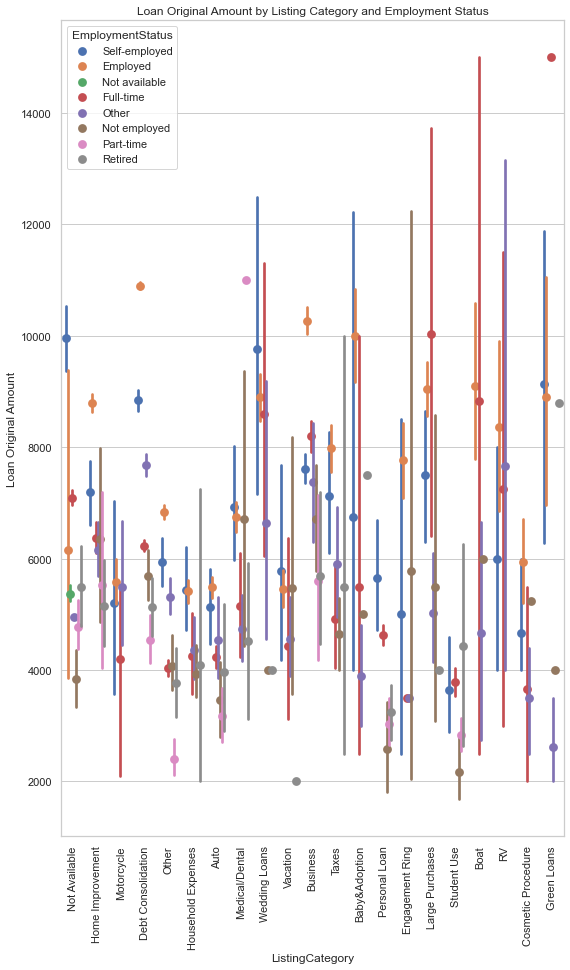

<Figure size 720x360 with 0 Axes>

In [65]:
#Plot relationship of LoanOriginalAmount against EmploymentStatus and ListingCategory for both dataframes

sb.pointplot(data = df_clean, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'deep', linestyles = '', dodge = 0.6)
plt.xticks(rotation=90)
plt.title("Loan Original Amount by Listing Category and Employment Status")
plt.ylabel("Loan Original Amount")
plt.figure(figsize=(10, 5))

### Observation
This is interesting "Self employed" people seems to spend more on "Wedding loans" than others. "Not employed" people have the largest span of Loan Amount when it comes to "Engagement Rings". Employed people are borrowing money mostly for "Baby & Adoption". These information could help to get an idea of the relevance of the loan in relation to fullfill a certain need which is important to deliver a working marketing message


### What impact does Home Ownership on the Listing Category and the Loan Amount?

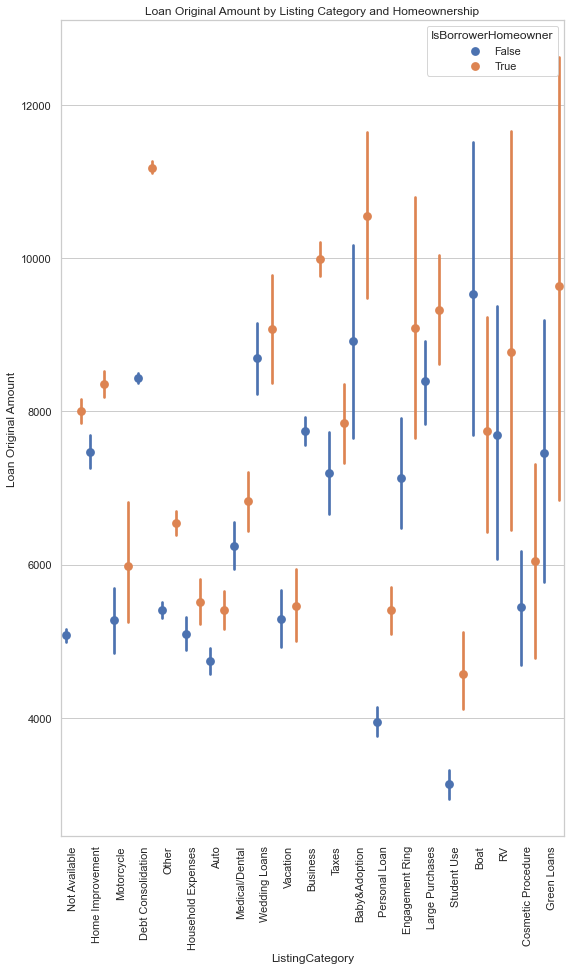

<Figure size 720x360 with 0 Axes>

In [66]:
#Plot relationship of LoanOriginalAmount against Homeownership and ListingCategory for both dataframes

sb.pointplot(data = df_clean, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'deep', linestyles = '', dodge = 0.6)
plt.xticks(rotation=90)
plt.title("Loan Original Amount by Listing Category and Homeownership")
plt.ylabel("Loan Original Amount")
plt.figure(figsize=(10, 5))
plt.show()

### Observation
People owning a home borrow money for debt consolidation and Baby & Adoption. This seems reasonable because they builded their "nest". People with no home are borrowing the largest amount for "Boat". This must be due to an outlier. However, also "Wedding Loans" and "Personal Loans" play an important role.

### Summary Multivariate eploration

Homeowners seems to are more interest in "stabilize their life" than no home owners who cherish a more consumeristic driven life style. Quite interesting is the relation between the employment status "Self employed" and wedding loans.

## Conclusions
It's a cynical approach to check for opportunities how to get more money out of people who already borrow money. However it was a good lecture of drilling into a huge dataset getting more and more insights out of it. 
